# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

**STUDENT: DARIO MASSA**
ID = 2039311

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.24.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2039311
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 64 72 66 61 62 57 58 56 45]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [59 64 72 66 61 62 57 58 56 45]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


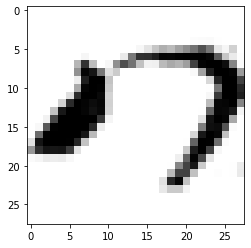

LABEL: 5
INPUT:


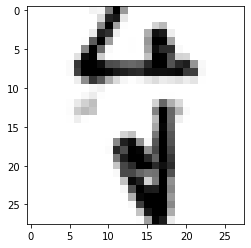

LABEL: 2
INPUT:


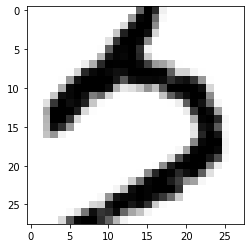

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
import warnings
warnings.filterwarnings('ignore')
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE

grid_search = GridSearchCV(mlp, parameters, cv=5)
grid_search.fit(X_train, y_train)

import pandas as pd 

print ('RESULTS FOR NN\n')

df = pd.DataFrame(grid_search.cv_results_)
df

RESULTS FOR NN



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.203900,0.030840,0.000509,0.000240,"(10,)","{'hidden_layer_sizes': (10,)}",0.641667,0.641667,0.675000,0.700000,0.591667,0.650000,0.036515,5
1,0.190609,0.023839,0.000576,0.000210,"(20,)","{'hidden_layer_sizes': (20,)}",0.725000,0.700000,0.750000,0.725000,0.708333,0.721667,0.017159,2
2,0.248630,0.013599,0.000712,0.000196,"(40,)","{'hidden_layer_sizes': (40,)}",0.741667,0.741667,0.783333,0.725000,0.708333,0.740000,0.024944,1
3,0.162609,0.013889,0.000703,0.000212,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.666667,0.691667,0.733333,0.708333,0.700000,0.700000,0.021731,3
4,0.249514,0.046737,0.000729,0.000305,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.683333,0.641667,0.766667,0.675000,0.683333,0.690000,0.041298,4


In [9]:
print("Best parameters set found:",grid_search.best_params_)

best_layer_sizes = grid_search.best_params_['hidden_layer_sizes']

print("Score with best parameters:",grid_search.best_score_)

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.74


In [10]:
print("\nAll scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)


All scores on the grid:
0    0.650000
1    0.721667
2    0.740000
3    0.700000
4    0.690000
Name: mean_test_score, dtype: float64
0    0.036515
1    0.017159
2    0.024944
3    0.021731
4    0.041298
Name: std_test_score, dtype: float64


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [11]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 50, 150,300,480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes = best_layer_sizes)

grid_search = GridSearchCV(mlp, parameters, cv=kf)

grid_search.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

df = pd.DataFrame(grid_search.cv_results_)
df

RESULTS FOR NN



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.168796,1.568115,0.000770,0.000193,1,{'batch_size': 1},0.100000,0.125000,0.075000,0.075000,0.108333,0.096667,0.019437,6
1,0.238132,0.003518,0.000614,0.000104,32,{'batch_size': 32},0.733333,0.708333,0.725000,0.733333,0.691667,0.718333,0.016159,4
2,0.241626,0.040064,0.000567,0.000100,50,{'batch_size': 50},0.750000,0.700000,0.716667,0.750000,0.700000,0.723333,0.022608,2
3,0.232822,0.013439,0.000533,0.000082,150,{'batch_size': 150},0.741667,0.700000,0.725000,0.716667,0.700000,0.716667,0.015811,5
4,0.255506,0.004639,0.000580,0.000162,300,{'batch_size': 300},0.758333,0.741667,0.716667,0.725000,0.700000,0.728333,0.020138,1
5,0.254328,0.005476,0.000568,0.000112,480,{'batch_size': 480},0.750000,0.733333,0.716667,0.708333,0.700000,0.721667,0.017951,3


In [12]:
print("Best parameters set found:",grid_search.best_params_)
best_batch_size=grid_search.best_params_['batch_size']
print("Score with best parameters:",grid_search.best_score_)

print("\nAll scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

Best parameters set found: {'batch_size': 300}
Score with best parameters: 0.7283333333333333

All scores on the grid:
0    0.096667
1    0.718333
2    0.723333
3    0.716667
4    0.728333
5    0.721667
Name: mean_test_score, dtype: float64
0    0.019437
1    0.016159
2    0.022608
3    0.015811
4    0.020138
5    0.017951
Name: std_test_score, dtype: float64


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
For what concerns the architectures, the best number of layers is 1, with the larger sampled size. 
This seems to give a clue on the fact that, at least for the low number of samples taken into exam, at the price of a longer computational time, the one dense layer case is performing better from the poin of view of the mean_test_score. However it should be noticed that looking at the std_test_score the best performance comes with the higher number of layers. From the point of view of batch sizes, the best result comes with 300, so a trade off with favours high values. Clearly, if the batch size is 1 and we are dealing with SGD, the convergence time is the largest possible, but its lowering stabilizes immediately with the increase of the batch size 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.18 sec

Training MLP of size (20,) ...
Done, training time: 0.24 sec

Training MLP of size (40,) ...
Done, training time: 0.37 sec

Training MLP of size (20, 20) ...
Done, training time: 0.21 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.32 sec



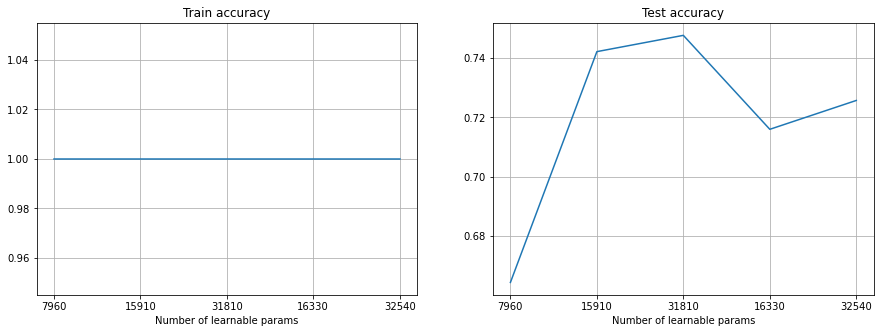

In [13]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
   
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, 
                    hidden_layer_sizes=hl_size,batch_size=best_batch_size)
    
    mlp.fit(X_train, y_train)

    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
This intresting trial gives us a clear example of movement from underfitting to overfitting situation by varying the number of learnable parameters (weights) of the network. First of all, the train accurancy plot displays that even with a very simple and small network made up of a single (10,) layer we can learn the training set properly, even though it is not enough to generalize to unseen data in the test set. As we increase the size of the single layer, we reach an optimal solution, which is actually consistent with what we found in TODO1 with GridSearch. 
As we instead introduce more layers, the power of the network increases but overfitting is present and the network specializes on the training data, loosing its ability to generalize well. 

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

In [14]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}


parameters = {'learning_rate_init': [0.0002, 0.002, 0.02, 0.2]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes = best_layer_sizes,
                    batch_size = best_batch_size)

grid_search = GridSearchCV(mlp, parameters, cv=kf)

grid_search.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

df = pd.DataFrame(grid_search.cv_results_)
df

RESULTS FOR NN



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.305948,0.003837,0.000596,0.000201,0.0002,{'learning_rate_init': 0.0002},0.225000,0.300000,0.250000,0.266667,0.233333,0.255000,0.026667,4
1,0.303033,0.004923,0.000757,0.000222,0.002,{'learning_rate_init': 0.002},0.625000,0.725000,0.583333,0.566667,0.625000,0.625000,0.055025,3
2,0.325674,0.027537,0.000847,0.000285,0.02,{'learning_rate_init': 0.02},0.750000,0.733333,0.716667,0.741667,0.691667,0.726667,0.020683,1
3,0.155186,0.002546,0.000603,0.000191,0.2,{'learning_rate_init': 0.2},0.741667,0.716667,0.733333,0.733333,0.683333,0.721667,0.020817,2


Best parameters set found: {'learning_rate_init': 0.02}
Score with best parameters: 0.7266666666666668

All scores on the grid:
0    0.255000
1    0.625000
2    0.726667
3    0.721667
Name: mean_test_score, dtype: float64
0    0.026667
1    0.055025
2    0.020683
3    0.020817
Name: std_test_score, dtype: float64
Training MLP of lr 0.0002 ...
Done, training time: 6.34 sec

Training MLP of lr 0.002 ...
Done, training time: 0.37 sec

Training MLP of lr 0.02 ...
Done, training time: 0.37 sec

Training MLP of lr 0.2 ...
Done, training time: 0.22 sec



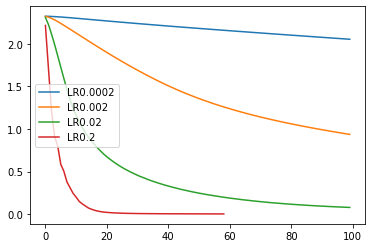

In [15]:
print("Best parameters set found:",grid_search.best_params_)
best_learning_rate_init=grid_search.best_params_['learning_rate_init']
print("Score with best parameters:",grid_search.best_score_)

print("\nAll scores on the grid:")
print(df.mean_test_score)
print(df.std_test_score)

for lr_value in lr_list:
    
    print('Training MLP of lr {} ...'.format(lr_value))
   
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_sizes,batch_size=best_batch_size,
                    learning_rate_init = lr_value)
    
    mlp.fit(X_train, y_train)
    
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

    loss = mlp.loss_curve_

    plt.plot(loss,label='LR'+str(lr_value))
plt.legend()


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
By increasing the learning rate, the network learns faster. A similar decreasing trend is indeed followed by the convergence time. 
The highest LR lead to an end before the 100 steps. The best evaluated parameter via GridSearch is 0.02 

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.001667
Best NN test error: 0.251500


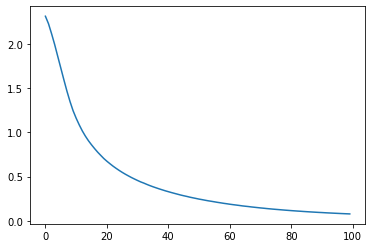

In [16]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_sizes,batch_size=best_batch_size,
                    learning_rate_init = best_learning_rate_init)
    
mlp.fit(X_train, y_train)

loss = mlp.loss_curve_

plt.plot(loss,label='HLS='+str(best_layer_sizes)+', BS='+str(best_batch_size)+', LR='+str(best_learning_rate_init))

print ('\nRESULTS FOR BEST NN\n')


training_error=1.0 - mlp.score(X_train,y_train)
test_error=1.0 - mlp.score(X_test,y_test)

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2039 1975 2012 1981 1992 1932 2033 1963 1997 2076]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN

Best NN training error: 0.001000
Best NN test error: 0.095175


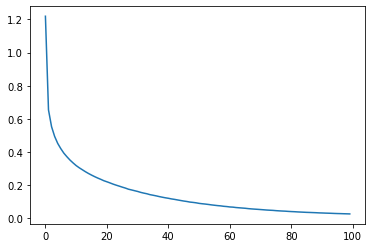

In [18]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_sizes,batch_size=best_batch_size,
                    learning_rate_init = best_learning_rate_init, verbose=False)
    
mlp_large.fit(X_train, y_train)

loss = mlp_large.loss_curve_

plt.plot(loss,label='HLS='+str(best_layer_sizes)+', BS='+str(best_batch_size)+', LR='+str(best_learning_rate_init))

print ('\nRESULTS FOR BEST NN\n')


training_error=1.0 - mlp_large.score(X_train,y_train)
test_error=1.0 - mlp_large.score(X_test,y_test)

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
When the larger number of samples (20'000) is used to train the network, a much better result is obtained from the point of view of the test error, with a gain of 15%. This is a known fact: the more samples the better it is. From the point of view of the training error, a much smaller variation is found between the two cases. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

NN_prediction 3
large_NN_prediction 5

True  Label
INPUT:


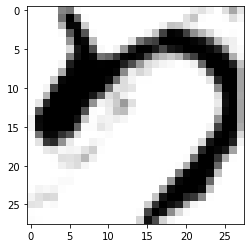

LABEL: 5


In [19]:
X = X[permutation]
y = y[permutation]

m_training = 600

X_train_small, X_test_small = X[:m_training], X[m_training:]
y_train_small, y_test_small = y[:m_training], y[m_training:]

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_sizes,batch_size=best_batch_size,
                    learning_rate_init = best_learning_rate_init)
    
mlp.fit(X_train_small, y_train_small)

NN_prediction = mlp.predict(X_train_small)


m_training = 20000

X_train_large, X_test_large = X[:m_training], X[m_training:]
y_train_large, y_test_large = y[:m_training], y[m_training:]

mlp_large = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_sizes,batch_size=best_batch_size,
                    learning_rate_init = best_learning_rate_init)
    
mlp_large.fit(X_train_large, y_train_large)

large_NN_prediction = mlp_large.predict(X_train_large)

for ii in range(len(y_train_small)):
    if y_train_small[ii] != NN_prediction[ii] and y_train_large[ii] == large_NN_prediction[ii]:  
        print(f'NN_prediction {NN_prediction[ii]}')
        print(f'large_NN_prediction {large_NN_prediction[ii]}')
        print('\nTrue  Label')
        plot_input(X_train_small, y_train_small, ii)
        break
        
#ADD YOUR CODE
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


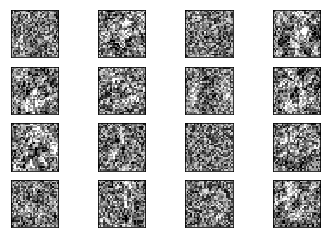

Weights with 20000 data points:


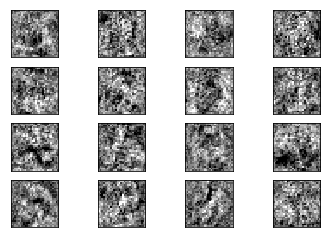

In [20]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
From the case of 20000 data points, the most probable observation by looking at the weights is that there is the formation of stronger patterns and it starts to be easier to discriminate between the weight maps since they show peculiarities. In the case of small number of samples instead the maps are pretty similar one to each other, and patterns much less underlined. 

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [21]:
m_training = 20000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE

best_SVM = SVC(kernel='rbf', C=7, gamma=0.01)

best_SVM.fit(X_train,y_train)

training_error= 1.0 - best_SVM.score(X_train,y_train)

test_error= 1.0 - best_SVM.score(X_test,y_test)
print ('RESULTS FOR SVM')
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

RESULTS FOR SVM
Best SVM training error: 0.000150
Best SVM test error: 0.044900


In [22]:
from sklearn import linear_model

#regL2 = #ADD YOUR CODE

# you can re-use your code from Lab 2

#ADD YOUR CODE

logreg = linear_model.LogisticRegression(C=1,fit_intercept=True,max_iter=3000)
logreg.fit(X_train,y_train)
training_error= 1.0 - logreg.score(X_train,y_train)
test_error= 1.0 - logreg.score(X_test,y_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Best logistic regression training error: 0.120550
Best logistic regression test error: 0.206600


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]
Reporting here all the results for comparison (all ran with 20000 samples for equity)<br>
<br>
RESULTS FOR BEST NN<br>
Best NN training error: 0.001000<br>
Best NN test error: 0.095175<br>
<br>
RESULTS FOR SVM<br>
RESULTS FOR SVM<br>
Best SVM training error: 0.000150<br>
Best SVM test error: 0.044900<br>
<br>
RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION<br>
Best logistic regression training error: 0.120550<br>
Best logistic regression test error: 0.206600<br>
<br>
<br>
As expected and seen during the lectures, SVM is able to outperform NN, in this case by a 5%. The worst is the Logistic Regression, which of course is much less powerful and flexible having a strong prior.
